In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def fst(lst):
    return [e[0] for e in lst]
def snd(lst):
    return [e[1] for e in lst]

In [3]:
#KP20k
patterns = [
 (25532, ('NOUN',)),
 (21143, ('NOUN', 'NOUN')),
 (16976, ('ADJ', 'NOUN')),
 ( 5184, ('ADJ', 'NOUN', 'NOUN')),
 ( 3280, ('VERB',)),
 ( 3115, ('VERB', 'NOUN')),
 ( 3108, ('NOUN', 'NOUN', 'NOUN')),
 ( 1717, ('ADJ',)),
 ( 1704, ('ADJ', 'ADJ', 'NOUN')),
 ( 1153, ('NOUN', 'VERB'))
]

In [70]:
utils.reference

NameError: name 'utils' is not defined

In [4]:
dist_len_kp_dataset = {
    'full': {
        'CSTR': {2: 1506, 1: 728, 3: 377, 4: 75, 5: 13, 6: 5, 7: 5},
        'NUS': {3: 356, 2: 1142, 4: 103, 1: 612, 6: 19, 5: 41, 7: 2, 70: 1, 29: 1, 35: 1, 52: 1, 19: 1, 9: 1, 8: 1},
        'PubMed': {1: 3094, 2: 2700, 3: 901, 4: 216, 7: 26, 6: 61, 5: 104, 8: 9, 13: 1, 9: 7, 10: 3, 18: 1, 12: 2, 22: 1},
        'ACM': {2: 7547, 3: 1959, 1: 2329, 4: 368, 6: 20, 5: 70, 8: 1, 7: 2},
        'Citeulike-180': {1: 828, 3: 10, 2: 139},
    },
    'abstract': {
        'SemEval-2010': {3: 285, 1: 309, 4: 72, 5: 25, 2: 817, 6: 2, 9: 1, 7: 1, 8: 1},
        'Inspec': {2: 2584, 1: 660, 3: 1220, 4: 335, 6: 31, 5: 76, 7: 5, 9: 2},
        'KDD': {2: 1739, 1: 788, 8: 2, 3: 434, 4: 110, 5: 17, 7: 1, 6: 2},
        'WWW': {2: 3049, 3: 787, 1: 2197, 4: 330, 5: 28, 8: 2, 6: 7, 7: 5},
        'TermITH-Eval': {1: 2456, 3: 423, 2: 1675, 4: 72, 5: 57, 8: 2, 6: 11, 7: 9, 12: 1, 16: 1, 15: 1, 10: 3, 14: 1, 9: 1},
        'KP20k': {3: 15510, 2: 48843, 1: 35059, 4: 3309, 5: 1148, 6: 1027, 8: 119, 7: 377, 13: 10, 14: 5, 15: 12, 18: 3, 12: 15, 9: 46, 33: 1, 105: 1, 10: 33, 19: 4, 17: 3, 11: 19, 16: 3, 27: 1, 20: 4, 23: 2, 24: 1, 0: 1, 28: 3, 21: 1, 25: 1},
    },
    'news': {
        'DUC-2001': {3: 434, 4: 74, 2: 1520, 1: 431, 5: 22, 6: 7},
        '110-PT-BN-KP': {3: 28, 1: 172, 2: 71, 0: 1, 4: 3, 5: 1},
        '500N-KPCrowd': {1: 1640, 2: 451, 4: 37, 3: 142, 6: 15, 7: 5, 5: 19, 9: 1},
        'WikinewsKeyphrase': {1: 603, 2: 203, 3: 91, 5: 22, 4: 39, 6: 8},
        'KPTimes': {1: 47761, 2: 33916, 3: 11821, 4: 5085, 5: 1881, 6: 757, 7: 380, 8: 102, 10: 10, 9: 64, 12: 8, 13: 6, 11: 6, 18: 2, 17: 1, 14: 2},
        #'NTCIR1+2': {3: 238118, 2: 742838, 4: 63168, 1: 451840, 6: 9759, 5: 24977, 7: 3610, 10: 289, 8: 1732, 9: 626, 11: 155, 12: 132, 15: 19, 13: 55, 16: 12, 14: 27, 17: 6, 19: 4, 18: 2, 23: 1, 22: 2, 20: 2, 21: 2, 34: 1},
        #'RefSeerX': {1: 67875, 2: 32394, 3: 8912, 4: 1838, 5: 393, 7: 41, 6: 94, 12: 3, 9: 15, 15: 5, 11: 4, 23: 1, 8: 17, 17: 1, 24: 1, 10: 3}
    }
}

In [5]:
dist_len_kp_dataset = [(t, d, c, f) for t, v in dist_len_kp_dataset.items() for d, vv in v.items() for c, f in vv.items()]
dist_len_kp_dataset = pd.DataFrame(dist_len_kp_dataset, columns=['type', 'dataset', 'nb', 'freq'])
dist_len_kp_dataset['norm_freq'] = dist_len_kp_dataset.groupby('dataset')['freq'].transform(lambda x: x / x.sum()) * 100
#dist_len_kp_dataset = {k: map(tuple, v.items()) for k, v in dist_len_kp_dataset.items()}
#dist_len_kp_dataset = {k: sorted(v, key=lambda x: x[0]) for k, v in dist_len_kp_dataset.items()}

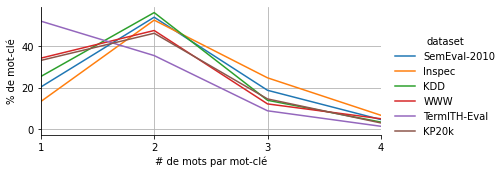

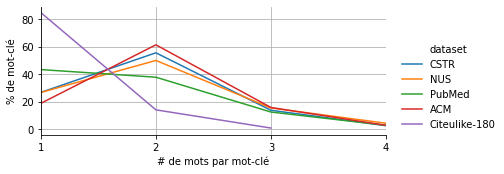

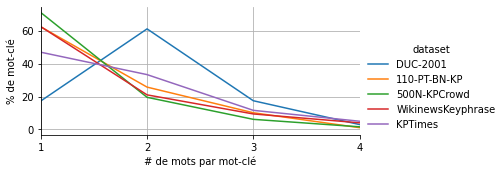

In [12]:
for k, sub_df in dist_len_kp_dataset.groupby('type'):
    sub_df = sub_df[sub_df['nb'] != 0]
    #sub_df = dist_len_kp_dataset[dist_len_kp_dataset['nb'] != 0]
    #sub_df = sub_df[sub_df['dataset'].isin(['Inspec', 'KDD', 'TermITH-Eval', 'KP20k'])]
    g = sns.relplot(data=sub_df, x='nb', y='norm_freq', hue='dataset', kind='line')#, style='type', markers='o')
    g.set(xlim=(1, 4))
    g.set_xlabels('# de mots par mot-clé')
    g.set_ylabels('% de mot-clé')
    g.ax.set_xticks([1, 2, 3, 4])
    g.fig.set_figwidth(7)
    g.fig.set_figheight(2)
    plt.grid(True)

In [8]:
dist_kp_length = {
    3: 12196, 2: 25913, 1: 8499, 4: 6154, 5: 2234, 7: 581, 8: 275, 6: 1260, 13: 20, 14: 5,
    15: 12, 9: 131, 12: 23, 16: 5, 10: 64, 27: 1, 78: 1, 19: 2, 23: 1, 11: 43, 17: 2,
    18: 4, 30: 2, 22: 3, 20: 1, 21: 1
}

aa = [[k] * v for k, v in dist_kp_length.items() if k < 10]
aa = [e for l in aa for e in l]

dist_kp_length = [(c, f) for c, f in dist_kp_length.items()]
dist_kp_length = pd.DataFrame(dist_kp_length, columns=['nb', 'freq'])
dist_kp_length['norm_freq'] = dist_kp_length['freq'].transform(lambda x: x / x.sum()) * 100

In [9]:
for k, sub_df in dist_nb_kp_dataset.groupby('type'):
    g = sns.relplot(data=sub_df, x='nb', y='norm_freq', hue='dataset', kind='line', style='type', markers='o')
    g.set(xlim=(-1, 25))
    g.set_xlabels('# de mots-clés par document')
    g.set_ylabels('% de document')
    g.ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20])
    g.fig.set_figwidth(7)
    g.fig.set_figheight(2)
    plt.grid(True)

NameError: name 'dist_nb_kp_dataset' is not defined

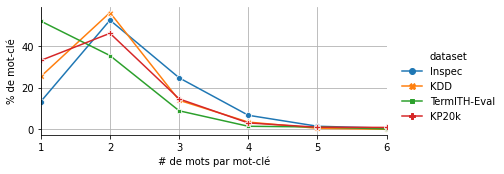

In [30]:
sub_df = dist_len_kp_dataset[dist_len_kp_dataset['nb'] != 0]
sub_df = sub_df[sub_df['dataset'].isin(['Inspec', 'KDD', 'TermITH-Eval', 'KP20k'])]
g = sns.relplot(data=sub_df, x='nb', y='norm_freq', hue='dataset',
                kind='line', style='dataset', dashes=False, markers=True)
g.set(xlim=(1, 6))
g.set_xlabels('# de mots par mot-clé')
g.set_ylabels('% de mot-clé')
#g.ax.set_xticks([1, 2, 3, 4])
g.fig.set_figwidth(7)
g.fig.set_figheight(2)
plt.grid(True)

In [74]:
sub_df = dist_len_kp_dataset[dist_len_kp_dataset['nb'] != 0]
sub_df = sub_df[sub_df['dataset'].isin(['Inspec', 'KDD', 'TermITH-Eval', 'KP20k'])]
aa = sub_df[['dataset', 'nb', 'norm_freq']]
marks = ['*', 'square*', 'triangle*', '+']
for i, (k, s) in enumerate(aa.groupby('dataset')):
    s = s[['nb', 'norm_freq']].set_index('nb').to_records('list')
    s = ''.join(map(str, sorted(s, key=lambda x: x[0])))
    print(f'\\addplot+[mark={marks[i]}]')
    print(f'\tcoordinates{{ {s} }};')
    print(f'\t\\addlegendentry{{{k}}}')

\addplot+[mark=*]
	coordinates{ (1, 13.4337472)(2, 52.59515571)(3, 24.83207816)(4, 6.81864441)(5, 1.54691634)(6, 0.63097904)(7, 0.10177081)(9, 0.04070832) };
	\addlegendentry{Inspec}
\addplot+[mark=square*]
	coordinates{ (1, 25.47688328)(2, 56.22373101)(3, 14.03168445)(4, 3.55641772)(5, 0.54962819)(6, 0.06466214)(7, 0.03233107)(8, 0.06466214) };
	\addlegendentry{KDD}
\addplot+[mark=triangle*]
	coordinates{ (1, 33.21207643)(2, 46.26992924)(3, 14.69292636)(4, 3.13468042)(5, 1.08752285)(6, 0.97289719)(7, 0.35713947)(8, 0.11273103)(9, 0.0435767)(10, 0.03126155)(11, 0.01799907)(12, 0.01420979)(13, 0.0094732)(14, 0.0047366)(15, 0.01136783)(16, 0.00284196)(17, 0.00284196)(18, 0.00284196)(19, 0.00378928)(20, 0.00378928)(21, 0.00094732)(23, 0.00189464)(24, 0.00094732)(25, 0.00094732)(27, 0.00094732)(28, 0.00284196)(33, 0.00094732)(105, 0.00094732) };
	\addlegendentry{KP20k}
\addplot+[mark=+]
	coordinates{ (1, 52.11118184)(2, 35.53999576)(3, 8.97517505)(4, 1.52768937)(5, 1.20942075)(6, 0.2333969

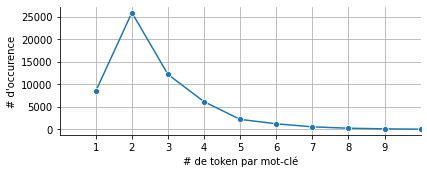

In [31]:
g = sns.relplot(data=dist_kp_length, x='nb', y='freq', kind='line', style=[True]*len(dist_kp_length), markers='o')
plt.grid(True)
g.set(xlim=(0, 10))
g.fig.set_figwidth(7)
g.fig.set_figheight(2)
g.set_xlabels('# de token par mot-clé')
g.set_ylabels('# d\'occurence')
g.ax.set_xticks(range(1, 10))
g._legend.remove()

In [32]:
dist_nb_kp_dataset = {
    'full': {
        #'CSTR': {3: 69, 4: 99, 6: 64, 8: 35, 5: 132, 7: 47, 9: 15, 10: 11, 2: 11, 19: 1, 11: 5, 22: 1, 16: 2, 1: 4, 18: 1, 12: 3},
        'NUS': {27: 4, 29: 3, 24: 3, 7: 12, 2: 7, 9: 18, 5: 13, 10: 17, 12: 16, 15: 8, 14: 20, 18: 4, 8: 7, 13: 14, 16: 7, 6: 4, 11: 9, 3: 15, 4: 17, 19: 5, 17: 3, 34: 2, 28: 1, 41: 2},
        'PubMed': {4: 272, 5: 456, 7: 91, 6: 214, 3: 128, 13: 8, 10: 20, 9: 33, 2: 13, 8: 59, 1: 2, 12: 8, 34: 1, 21: 1, 11: 5, 14: 3, 18: 1, 20: 1, 15: 2, 17: 1, 19: 1},
        'ACM': {6: 293, 2: 93, 4: 551, 3: 376, 5: 540, 8: 96, 7: 147, 10: 32, 14: 9, 11: 23, 18: 5, 9: 57, 13: 21, 12: 17, 17: 9, 15: 7, 19: 7, 1: 2, 22: 1, 21: 1, 20: 5, 16: 10, 24: 2},
        #'Citeulike-180': {3: 19, 7: 15, 5: 46, 6: 26, 4: 40, 1: 3, 27: 1, 8: 11, 9: 1, 2: 10, 11: 3, 12: 1, 14: 2, 10: 2, 16: 1, 13: 1},
        'SemEval-2010': {19: 5, 13: 17, 15: 15, 14: 19, 16: 5, 10: 4, 12: 13, 20: 3, 11: 4, 21: 1, 17: 7, 18: 3, 25: 1, 24: 1, 8: 1, 28: 1},
    },
    'abstract': {
        'Inspec': {6: 48, 8: 45, 5: 44, 7: 52, 3: 11, 18: 11, 10: 41, 16: 16, 15: 19, 31: 1, 9: 32, 12: 23, 11: 33, 13: 17, 14: 23, 23: 4, 22: 4, 4: 32, 2: 10, 24: 1, 20: 3, 19: 7, 21: 8, 17: 12, 27: 1, 26: 1, 28: 1},
        'KDD': {6: 93, 2: 66, 5: 110, 4: 213, 3: 169, 1: 47, 8: 16, 7: 31, 10: 5, 12: 1, 9: 3, 13: 1},
        #'WWW': {2: 73, 4: 331, 5: 278, 6: 184, 9: 27, 7: 85, 8: 51, 3: 235, 11: 9, 1: 27, 13: 2, 12: 5, 10: 14, 16: 1, 15: 3, 14: 4, 21: 1},
        'TermITH-Eval': {22: 4, 28: 1, 26: 1, 19: 9, 16: 18, 13: 26, 11: 29, 17: 6, 10: 42, 7: 35, 25: 3, 20: 3, 24: 5, 14: 20, 21: 5, 23: 2, 15: 24, 9: 33, 18: 12, 12: 36, 8: 38, 31: 2, 30: 1, 6: 27, 33: 1, 4: 2, 5: 11, 37: 1, 3: 2},
        'KP20k': {3: 3452, 5: 5204, 4: 5341, 6: 2679, 2: 573, 8: 504, 7: 1002, 14: 44, 55: 1, 13: 43, 10: 155, 9: 260, 38: 3, 28: 25, 40: 5, 19: 38, 11: 87, 34: 11, 16: 41, 12: 69, 31: 17, 29: 17, 26: 23, 39: 2, 25: 18, 18: 33, 30: 20, 23: 33, 17: 38, 21: 46, 24: 25, 32: 15, 65: 1, 20: 39, 15: 37, 42: 4, 27: 17, 46: 1, 22: 24, 43: 2, 45: 1, 35: 11, 33: 11, 60: 1, 100: 1, 47: 3, 36: 9, 41: 1, 52: 1, 37: 2, 77: 1, 51: 1, 44: 2, 68: 2, 97: 1, 54: 1, 59: 1, 57: 1},
    },
    'news': {
        'DUC-2001': {8: 63, 6: 47, 5: 9, 12: 6, 9: 45, 11: 28, 10: 29, 7: 71, 3: 1, 4: 4, 13: 4, 14: 1},
        '110-PT-BN-KP': {37: 1, 33: 1, 23: 2, 35: 1, 26: 1, 39: 1, 20: 1, 30: 1, 10: 1},
        '500N-KPCrowd': {13: 1, 45: 2, 34: 2, 23: 1, 40: 3, 47: 1, 60: 2, 73: 1, 44: 2, 55: 1, 54: 1, 52: 1, 76: 1, 103: 1, 80: 1, 68: 2, 37: 1, 75: 1, 25: 2, 41: 2, 39: 3, 32: 3, 14: 1, 27: 1, 26: 1, 21: 1, 31: 1, 35: 1, 50: 1, 82: 1, 11: 1, 64: 2, 18: 1, 62: 1, 48: 1, 102: 1},
        'WikinewsKeyphrase': {9: 22, 8: 18, 11: 14, 4: 1, 10: 8, 7: 7, 13: 6, 5: 3, 12: 7, 14: 7, 15: 1, 6: 5, 17: 1},
        'KPTimes': {3: 3215, 4: 4598, 5: 3853, 2: 1173, 7: 2045, 6: 2828, 8: 1210, 9: 693, 10: 385},
        #'NTCIR1+2': {6: 79778, 4: 69968, 2: 9550, 3: 52553, 5: 75893, 1: 1224, 7: 9554, 8: 17791, 11: 77, 10: 214, 9: 901, 13: 19, 12: 40, 18: 2, 15: 4, 14: 10, 22: 1, 16: 4, 21: 1, 17: 1},
        #'RefSeerX': {13: 877, 18: 344, 11: 1329, 15: 618, 20: 304, 1: 340, 16: 486, 14: 732, 10: 541, 9: 301, 17: 432, 7: 344, 5: 330, 6: 333, 12: 1108, 3: 320, 8: 283, 19: 296, 2: 360, 4: 322}
    }
}

dist_nb_kp_dataset = [(t, d, c, f) for t, v in dist_nb_kp_dataset.items() for d, vv in v.items() for c, f in vv.items()]
dist_nb_kp_dataset = pd.DataFrame(dist_nb_kp_dataset, columns=['type', 'dataset', 'nb', 'freq'])
dist_nb_kp_dataset['norm_freq'] = dist_nb_kp_dataset.groupby('dataset')['freq'].transform(lambda x: x / x.sum()) * 100
#dist_nb_kp_dataset = {k: map(tuple, v.items()) for k, v in dist_nb_kp_dataset.items()}
#dist_nb_kp_dataset = {k: sorted(v, key=lambda x: x[0]) for k, v in dist_nb_kp_dataset.items()}

In [75]:
aa = dist_nb_kp_dataset[dist_nb_kp_dataset['type'] == 'abstract'][['dataset', 'nb', 'norm_freq']]
marks = ['*', 'square*', 'triangle*', '+']
for i, (k, s) in enumerate(aa.groupby('dataset')):
    s = s[['nb', 'norm_freq']].set_index('nb').to_records('list')
    s = ''.join(map(str, sorted(s, key=lambda x: x[0])))
    print(f'\\addplot+[mark={marks[i]}]')
    print(f'\tcoordinates{{ {s} }};')
    print(f'\t\\addlegendentry{{{k}}}')

\addplot+[mark=*]
	coordinates{ (2, 2.)(3, 2.2)(4, 6.4)(5, 8.8)(6, 9.6)(7, 10.4)(8, 9.)(9, 6.4)(10, 8.2)(11, 6.6)(12, 4.6)(13, 3.4)(14, 4.6)(15, 3.8)(16, 3.2)(17, 2.4)(18, 2.2)(19, 1.4)(20, 0.6)(21, 1.6)(22, 0.8)(23, 0.8)(24, 0.2)(26, 0.2)(27, 0.2)(28, 0.2)(31, 0.2) };
	\addlegendentry{Inspec}
\addplot+[mark=square*]
	coordinates{ (1, 6.22516556)(2, 8.74172185)(3, 22.38410596)(4, 28.21192053)(5, 14.56953642)(6, 12.31788079)(7, 4.10596026)(8, 2.1192053)(9, 0.39735099)(10, 0.66225166)(12, 0.13245033)(13, 0.13245033) };
	\addlegendentry{KDD}
\addplot+[mark=triangle*]
	coordinates{ (2, 2.865)(3, 17.26)(4, 26.705)(5, 26.02)(6, 13.395)(7, 5.01)(8, 2.52)(9, 1.3)(10, 0.775)(11, 0.435)(12, 0.345)(13, 0.215)(14, 0.22)(15, 0.185)(16, 0.205)(17, 0.19)(18, 0.165)(19, 0.19)(20, 0.195)(21, 0.23)(22, 0.12)(23, 0.165)(24, 0.125)(25, 0.09)(26, 0.115)(27, 0.085)(28, 0.125)(29, 0.085)(30, 0.1)(31, 0.085)(32, 0.075)(33, 0.055)(34, 0.055)(35, 0.055)(36, 0.045)(37, 0.01)(38, 0.015)(39, 0.01)(40, 0.025)(41, 0

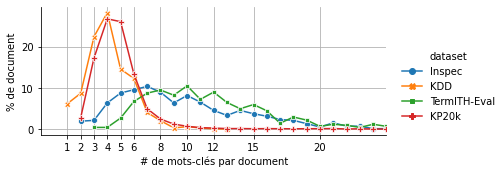

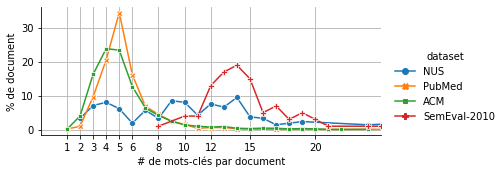

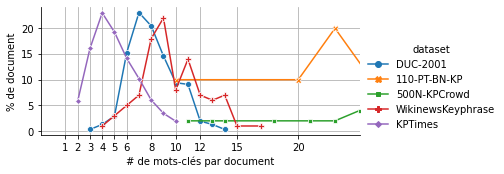

In [63]:
for k, sub_df in dist_nb_kp_dataset.groupby('type'):
    #g = sns.relplot(data=sub_df, x='nb', y='norm_freq', hue='dataset', kind='line', style='type', markers='o')
    g = sns.relplot(data=sub_df, x='nb', y='norm_freq', hue='dataset',
                kind='line', style='dataset', dashes=False, markers=True)
    g.set(xlim=(-1, 25))
    g.set_xlabels('# de mots-clés par document')
    g.set_ylabels('% de document')
    g.ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20])
    g.fig.set_figwidth(7)
    g.fig.set_figheight(2)
    plt.grid(True)

In [226]:
del g.legend

In [24]:
list(range(2))*5, [i for i in range(2) for _ in range(5)]

([0, 1, 0, 1, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

['o', 'o', 'o', '+', '+', '+']

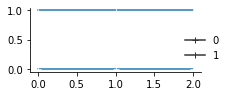

In [49]:
g= sns.relplot(x=[0,1,2,0,1,2], y=[0,0,0,1,1,1],
            kind='line', style=[0,0,0,1,1,1], dashes=False, markers=list('+|'))
g.fig.set_figwidth(3)
g.fig.set_figheight(1)

In [50]:
g.savefig('out2.svg')

In [16]:
plt.save('out.svg')

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [14]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns